## Assignment 2

### SVM's

Ana Araujo,  59457

Pedro Almeida, 58844

#### Content table:
- [Question 1](#section1)
- [Question 2](#section2)
- [Question 3](#section3)

The following exercises are based on the examples available at the following resource: https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/.

Following the tutorial, we solved the following issues:

<a id='section1'></a>
## Question 1:

If you remove a few support vectors and re-trained the SVM, what should happen to the decision boundary?
Verify your original assumptions by removing a few support vectors from the dataset, training a new SVM and comparing the obtained solution to the previous one.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

Accuracy on full training set:  0.8421052631578947

Removing the first 0 support vectors the accuracy is : 0.8421052631578947
Removing the first 10 support vectors the accuracy is : 0.8421052631578947
Removing the first 20 support vectors the accuracy is : 0.8421052631578947
Removing the first 30 support vectors the accuracy is : 0.8947368421052632
Removing the first 40 support vectors the accuracy is : 0.8947368421052632
Removing the first 50 support vectors the accuracy is : 0.868421052631579
Removing the first 60 support vectors the accuracy is : 0.868421052631579
Removing the first 70 support vectors the accuracy is : 0.868421052631579


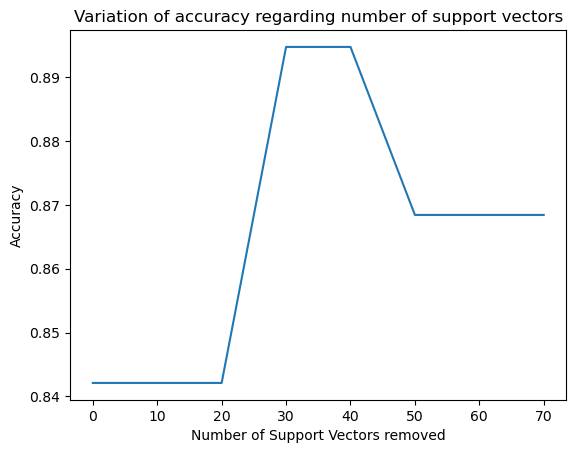

In [2]:
#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

C = 1

# Train the model with the all and without a few vectors in the training sets
mdl1 = svm.SVC(kernel='poly', degree=1, C=C, gamma = 'auto').fit(X_train, y_train)
preds = mdl1.predict(X_test)
print("Accuracy on full training set: ", accuracy_score(y_test, preds))
print()

lista = []
new_supports = 0
for i in range(0,71,10):
    #select the first i support vectors
    svs = mdl1.support_vectors_[:i]
    
    #remove those support vectors
    X_train_new = X_train[~np.isin(X_train, svs).all(1)]
    y_train_new = y_train[~np.isin(X_train, svs).all(1)]
    
    #train the model without those support vectors
    mdl2 = svm.SVC(kernel='poly', degree=1, C=C, gamma = 'auto').fit(X_train_new, y_train_new)
    preds2 = mdl2.predict(X_test)
    acc = accuracy_score(y_test, preds2)
    print(f'Removing the first {i} support vectors the accuracy is :', acc)
    lista.append(acc)

plt.plot(range(0,71,10), lista)
plt.xlabel('Number of Support Vectors removed')
plt.ylabel('Accuracy')
plt.title('Variation of accuracy regarding number of support vectors')
plt.show()

### Conclusions:
With the removel of support vectors (SV), the accuracy increased. This unexpected increment can be explained by:
 - the possible removal of outliers or noisy data points, that do not contribut to the overall pattern of the data. Their exclusion may help the model to generalize better to new data and can lead to improve its accuracy.
 - removing some support vectors can lead to a bigger margin, thus, allowing a better separation of the data.

#### Decision Boundaries: All vectors vs Less vectors:
Here we have a visual representation of the previous exercice:

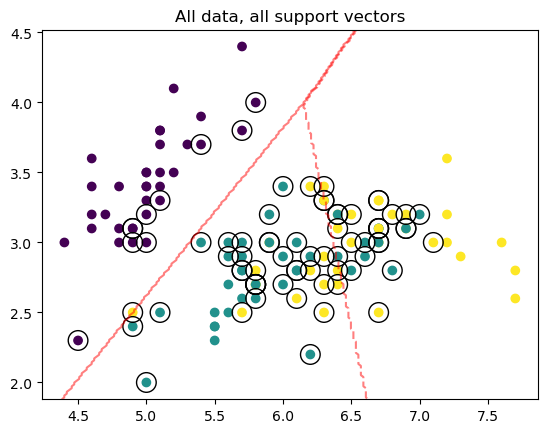

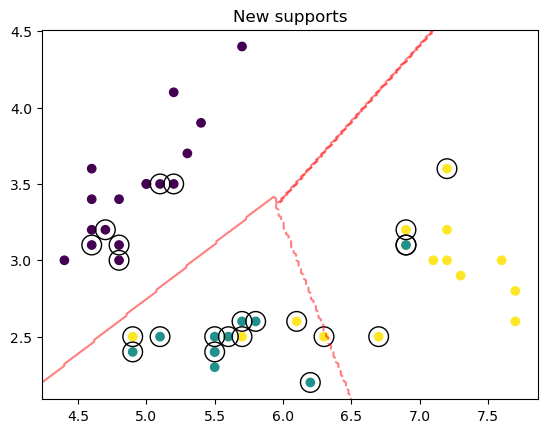

In [3]:
# Plot the decision boundary for the SVM trained with less vectors
new_support_vectors=mdl1.support_vectors_

all_svs = mdl1.support_vectors_
svs = mdl1.support_vectors_[:30]
    
#remove those support vectors
X_train_new = X_train[~np.isin(X_train, svs).all(1)]
y_train_new = y_train[~np.isin(X_train, svs).all(1)]

mdl2 = svm.SVC(kernel='poly', degree=1, C=C, gamma = 'auto').fit(X_train_new, y_train_new)
svs2 = mdl2.support_vectors_

def plotter(X_train,y_train, model,supports, title):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                         np.linspace(ylim[0], ylim[1], 200))
    Z_reduced = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z_reduced, colors='r', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(supports[:, 0], supports[:, 1],
                s=200, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()
    
plotter(X_train,y_train,mdl1,all_svs,'All data, all support vectors')
plotter(X_train_new,y_train_new,mdl2,svs2,'New supports')


Comparing the two figures above, it can be observed that the decision boundary separates better the data using less vectors.

<a id='section2'></a>
## Question 2:

Optimize the C and gamma hyperparameters using grid search with cross validation of 5 folds. How does the performance compare to base values? 

In [4]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100, 150, 200]}


model = svm.SVC(kernel='poly', degree=1, C=C, gamma = 'auto')

# Perform grid search with 5-fold cross-validation
g_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
g_search.fit(X_train, y_train)

print("Best hyperparameters are:", g_search.best_params_)

#prediction with model trained with the best combination of C and gamma
y_pred = g_search.predict(X_test)

#accuracy 
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))

Best hyperparameters are: {'C': 0.1, 'gamma': 150}
Accuracy on test set:  0.868421052631579


## Conclusions:
For this data split, **C** equal to 0.1 and **gamma** equal to 150 are the best hyperparameters. The accuracy value increased when compared to the base values. This don't guarantee that for a different split or other values wouldn't be more suitable.

<a id='section3'></a>
## Question 3:


Do the practice problem from the resource by:
• finding the additional feature to have a hyper-plane that separates the classes;
• visualizing in 3D the separation of the data (since the actual point positions are not provided, use approximate coordinates for the blue star and red dot points);
• use the SVM classifier from scikit-learn, with different kernels, to solve the problem and compare it with the solution you had previously obtained.

Here we visualize the data to have an idea of what we are dealing with.

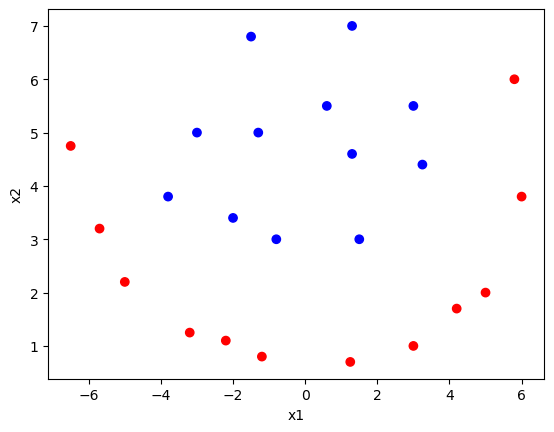

In [5]:
# Dataset 
df = pd.read_csv('points.csv')

y2 = df['color']
x2 = df.drop(columns=['color'])

x2 = np.array(x2)
y2 = np.array(y2)

plt.scatter(x2[:,0], x2[:,1], c=y2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

The shape of the data seems to follow a function y=x^2, so we'll try to do x to the power of 2 to see if the data becomes separable. First it was applied to just one feature and then it was performed for both features.

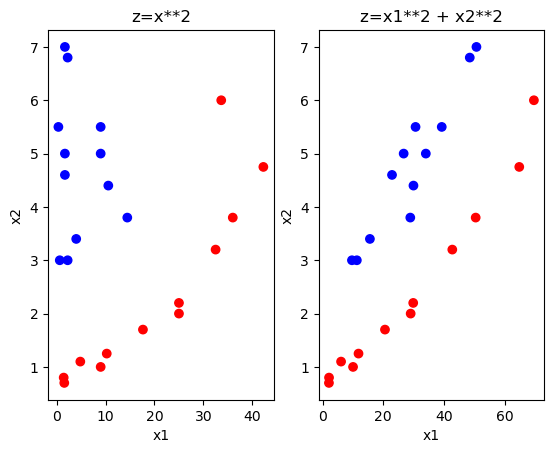

In [6]:
z = []
z2 = []
for i,j in zip(x2[:,0], x2[:,1]):
    z.append(i**2+j**2)
    z2.append(i**2)
    
plt.subplot(1, 2, 1)

plt.scatter(z2, x2[:,1], c=y2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('z=x**2')

plt.subplot(1, 2, 2)
plt.scatter(z, x2[:,1], c=y2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('z=x1**2 + x2**2')

plt.show()

After some experiments we reached to the conclusion that even though **z=x^2** (on the left) could separete the data, **z=x1^2+x2^2** gives a better separation. On the image below we can see this in a 3D projection.

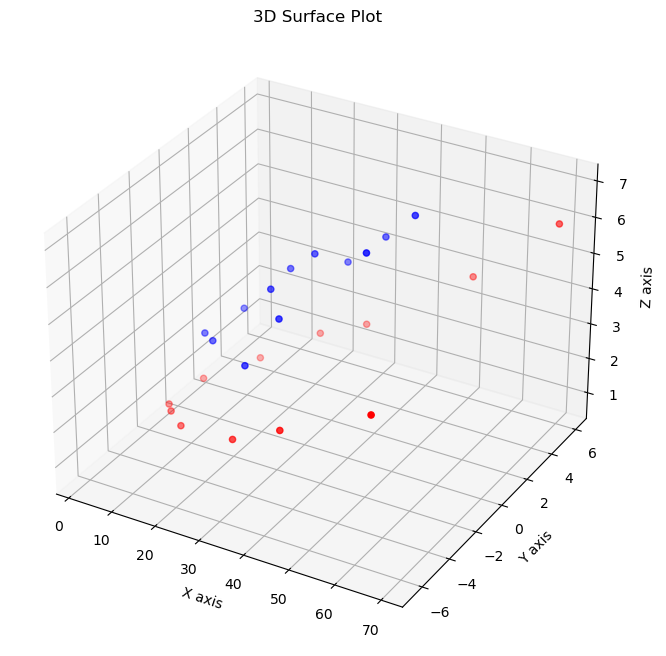

In [7]:
z = []

for i,j in zip(x2[:,0], x2[:,1]):
    z.append(i**2+j**2)
    
X1,X2 = np.meshgrid(x2[:,0], x2[:,1])
Z = np.array(X1**2 + X2**2)

# create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

z = np.array(z)

# plot the surface
#ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.scatter( z,x2[:,0], x2[:,1], c=y2, cmap='viridis')

# set the axis labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# show the plot
plt.show()

From Figure above, it can be verified that by introducing a new feature, the data became linearly separable.

The Figure below is the visual representation of the division in a 2D projection using an **rbf** kernel, since it's more suitable than the polynomial. Against our initial thought, that the polynomial kernel shoud be a suitable for the data since the decision boundary seems to be approximated by a polynomial function. However, due to the bad results, we chose to experiment the rbf kernel as the decision boundary is not linear and is able to deal with complex situations.

C:\Users\arauj\AppData\Local\Temp\ipykernel_32532\4064084685.py:26: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z_reduced, cmap=plt.cm.Paired, levels=[-1, 0, 1], alpha=0.8,


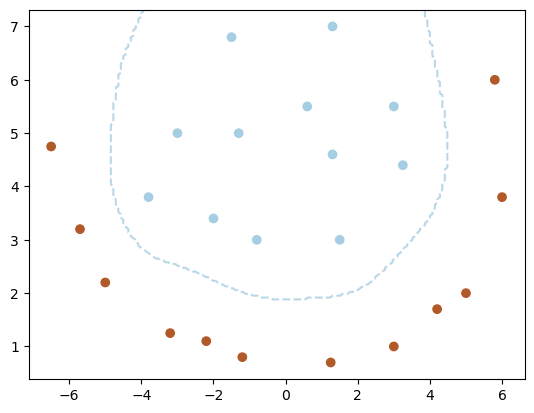

In [8]:
df = pd.read_csv('points.csv')
y = np.array(df['color'])

y2 = []
for i in y:
    if i == 'Red':
        y2.append(1)
    else:
        y2.append(0)
y2 = np.array(y2)
    
x2 = np.array(df.drop(columns=['color']))



model2 = svm.SVC(kernel='rbf', degree=1, C=20, gamma = 'auto').fit(x2, y2)

plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                     np.linspace(ylim[0], ylim[1], 200))
Z_reduced = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_reduced = Z_reduced.reshape(xx.shape)
plt.contour(xx, yy, Z_reduced, cmap=plt.cm.Paired, levels=[-1, 0, 1], alpha=0.8,
            linestyles=['--', '-', '--'])
plt.show()

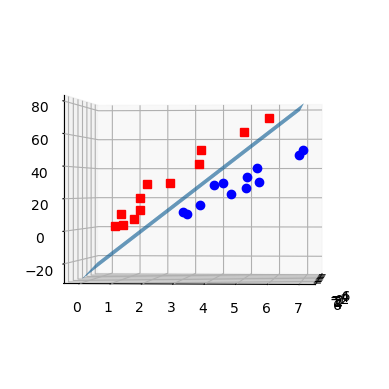

In [9]:
z = []

for i,j in zip(x2[:,0], x2[:,1]):
    z.append([i**2+j**2])

x2 = np.append(x2, z,axis=1)
X = x2  # we only take the first three features.
Y = y2

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

z = [lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
]
tmp = np.linspace(0,7,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(60, 120)

#to adjust the point of view
ax.elev = 0
ax.azim = 0  # xz view

ax.elev = 0
ax.azim = 0    # yz view

ax.elev = 0
ax.azim = 5  # xy view

plt.show()


From this point of view we can clearly see a hyperplane separating the data in the two classes. The solution from the sckity learn for separation in 3D using a linear kernel is similar to our solution.